In [1]:
from src.err_analysis import *

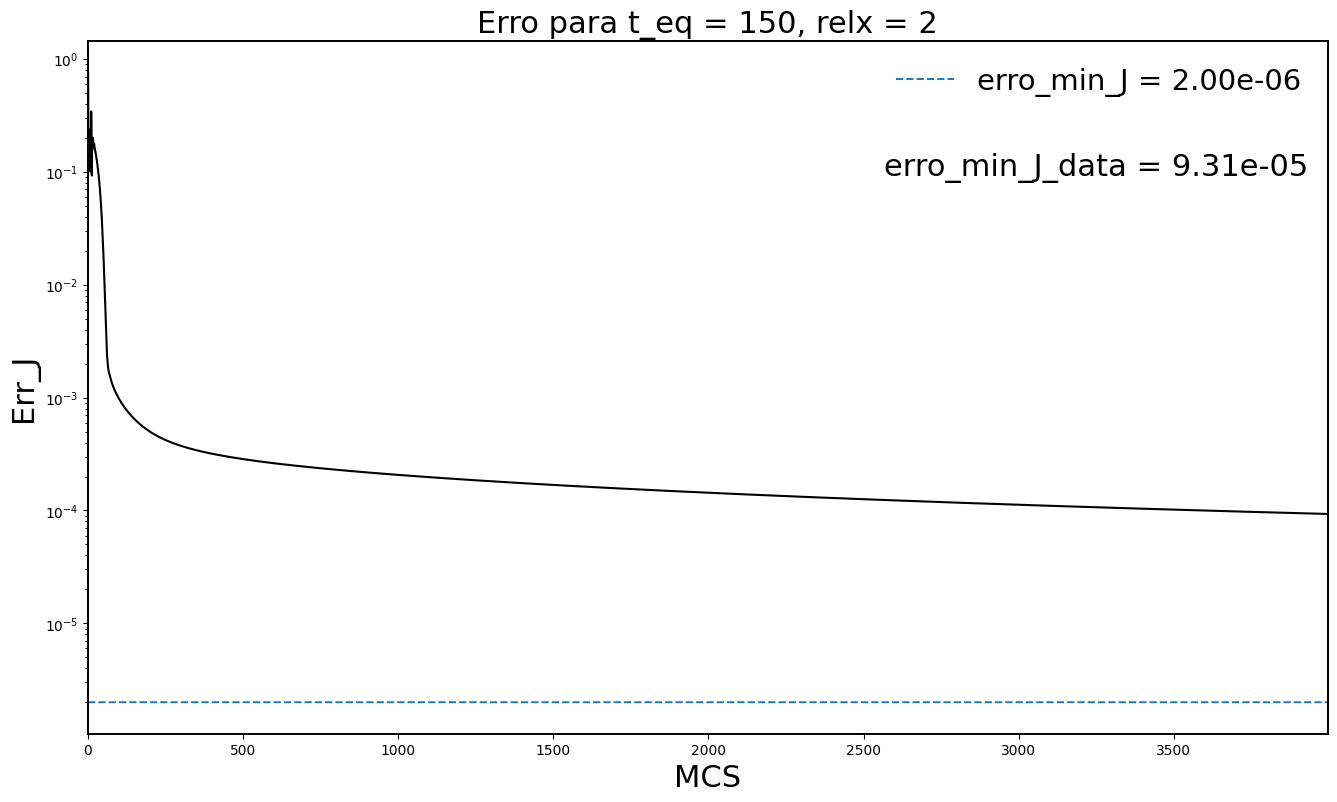

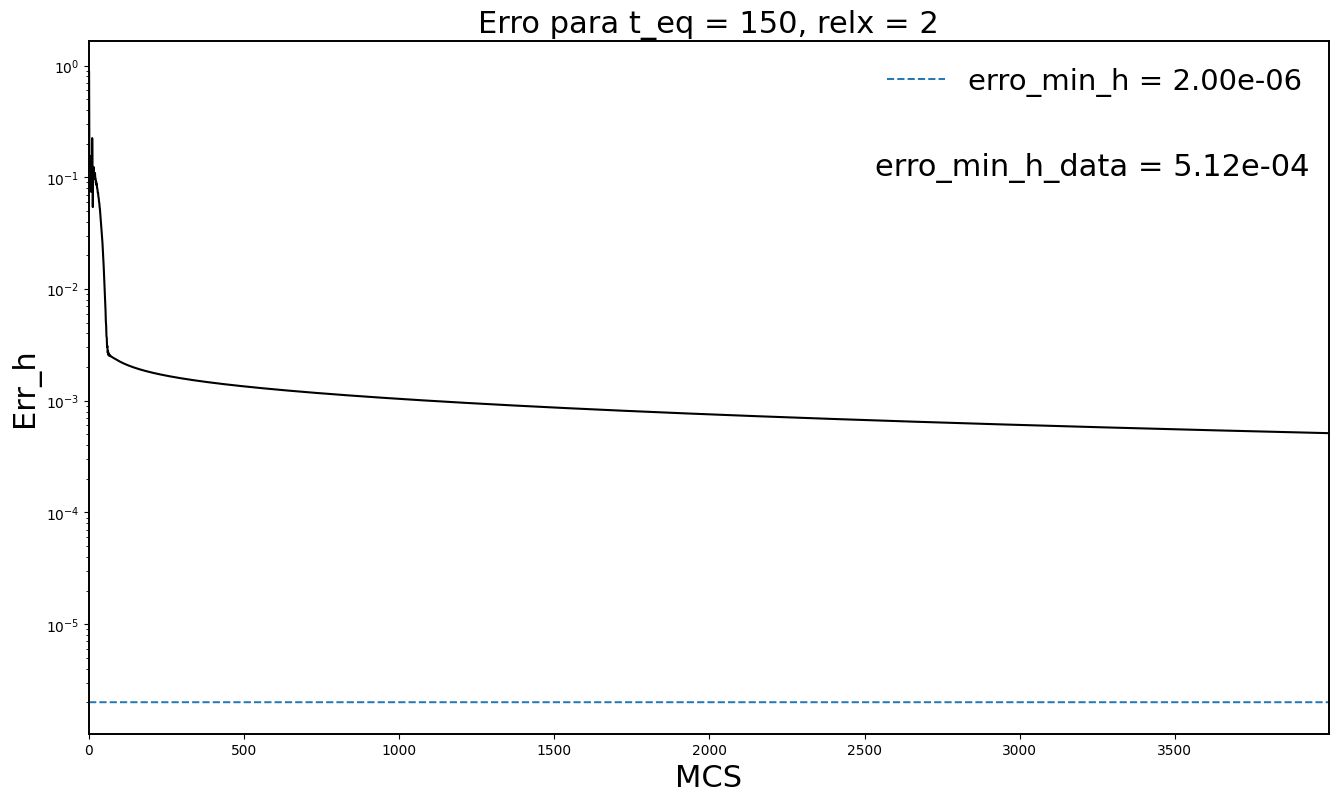

data_min_h = 5.12e-04,data_min_j = 9.31e-05, t_eq = 150, relx =  2


In [10]:
if __name__ == "__main__":
    
    arquivo_selecionado = select_file()
    if arquivo_selecionado:
        mcs_values, erroJ_values, erroh_values = load_data(arquivo_selecionado)
        plotting_graphs2(mcs_values, erroJ_values, erroh_values, arquivo_selecionado)
    else:
        print("Nenhum arquivo foi selecionado.")